### kNN regression
- 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
- __이웃의 평균__ 을 구함

## 회귀 알고리즘과 모델 규제
- 회귀 (Regression) : 두 변수 사이의 상관관계를 분석하는 방법
- 기존 데이터를 이용해서 임의의 숫자를 예측하는 문제: 결정계수(R^2)
- 정확한 숫자를 맞춘다는 것은 불가능

- 예시
    - 내년 경제 성장률 예측
    - 배달 도착 시간 예측
    - 농어의 무게 예측

In [1]:
import	numpy as	np
import	matplotlib.pyplot as	plt
perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,	
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,	
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,	
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,	
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,	
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])
perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,	
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,	
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,	
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

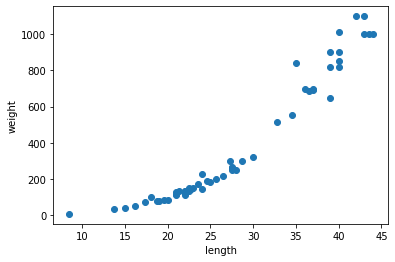

In [2]:
#	산점도 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [6]:
# scikit learn의 훈련세트는 2차원 데이터를 쓰기 때문에 1차원인 ndarray를 2차원으로 바꿔주는 작업 -> reshape(row,col) 사용
# reshape(-1,1): -1 : 행의 크기를 자동 지정
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### kNN regression 정확도 계산

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(test_input, test_target))

0.992809406101064


### score 함수
- 결정계수 R^2 값을 리턴
- 출력하는 값이 높을수록 정확도가 높음

- $ R^2 = 1 - \frac{(target-예측)^2의 합}{(target-target평균)^2의 합}$

### 평균절대오차(MAE)
- $MAE = \frac{1}{n} \Sigma_{1}^{n}|target_{i} - 예측값_{i}|$

In [9]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### 과대적합, 과소적합
- 과대적합(overfitting) : 훈련 세트에만 잘 맞는 모델
- 과소적합(underfitting) : 훈련 세트 $<$ 테스트 세트 이거나 두 점수 모두 낮은 경우

In [11]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 훈련세트 < 테스트세트 이므로 과소적합!

0.9698823289099254
0.992809406101064


In [14]:
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print(f'train: {knr.score(train_input, train_target)}')
print(f'test: {knr.score(test_input, test_target)}')

# 과소적합 -> 과대적합

train: 0.9804899950518966
test: 0.9746459963987609


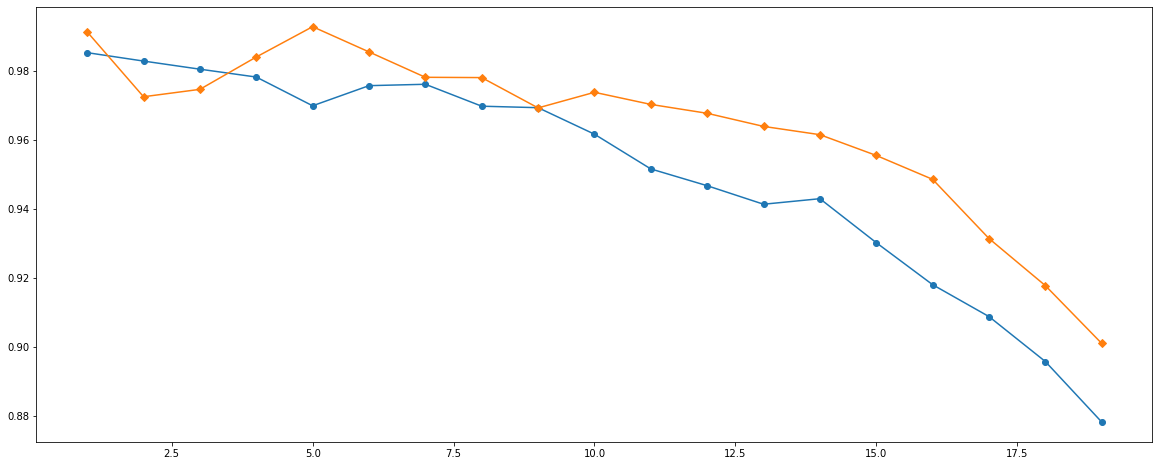

In [26]:
trains = []; tests = []
for i in range(1,20):
    knr.n_neighbors = i

    # 모델을 다시 훈련
    knr.fit(train_input, train_target)
    trains.append(knr.score(train_input, train_target))
    tests.append(knr.score(test_input, test_target))
plt.rcParams['figure.figsize'] = (20,8)
plt.plot(range(1, len(trains)+1), trains, marker='o')
plt.plot(range(1, len(tests)+1), tests, marker='D')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


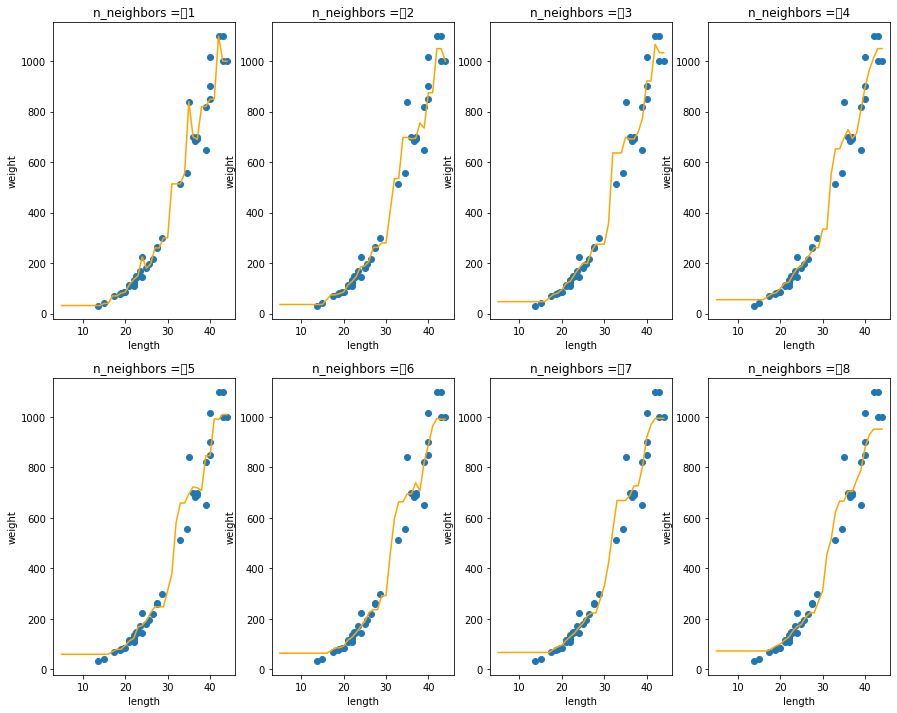

In [34]:
# 이웃의 수에 따른 그래프 비교

knr = KNeighborsRegressor()

# x: 농어의 길이(5~45까지 범위 설정) 
x = np.arange(5,45).reshape(-1,1)

fig, axes = plt.subplots(2,4, figsize=(15,12))
for n in [1,2,3,4,5,6,7,8]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    # 범위 x에 대해 농어의 길이 예측
    prediction = knr.predict(x)

    # 훈련세트와 예측결과 그래프 그리기
    plt.subplot(2,4,n)
    plt.scatter(train_input, train_target,	label='train	set')
    plt.plot(x,	prediction,	label='prediction',	color='orange')
    plt.title('n_neighbors =	{}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
   
plt.show()